In [29]:
import pandas as pd 
import numpy as np

df = pd.read_excel("COVID data.xlsx")

#df = pd.read_excel("COVID data - Team 2.xlsx")
#df = pd.read_excel("COVID data - Team 1.xlsx")

In [30]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [31]:
# Define the mapping
label_mapping = {"Not Detected": 0, "Positive": 1}


df["PCR"] = df["PCR"].map(label_mapping)

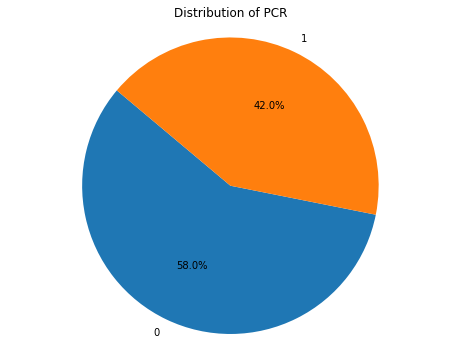

In [32]:
import matplotlib.pyplot as plt

y = df['PCR']

counts = y.value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of PCR')
plt.axis('equal') 
plt.show()


In [33]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#-------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#-------------------------------------
from scipy.stats import shapiro

#-------------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#-------------------------------------
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc

#-------------------------------------
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from statsmodels.stats.outliers_influence import variance_inflation_factor



#------------------------------------- 
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

In [34]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Compute summary statistics
summary_stats = df[numerical_cols].describe()
summary_stats

,AGE,BMI,BP_DIASTOLIC,BP_SYSTOLIC,PULSE,PULSE.OXIMETRY,RESPIRATIONS,TEMPERATURE,PCR
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,54.843986,31.019597,75.274283,125.603422,74.620533,92.607448,15.990438,97.553649,0.420232
std,18.346096,10.011837,13.357497,18.921280,16.945560,9.725741,3.856882,3.809207,0.493720
min,0.500000,2.280000,0.000000,38.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,42.500000,25.380000,67.000000,113.000000,63.000000,91.000000,15.000000,97.100000,0.000000
50%,56.100000,29.950000,76.000000,124.000000,74.000000,95.000000,16.000000,97.900000,0.000000
75%,67.700000,34.850000,84.000000,137.000000,84.000000,97.000000,18.000000,98.500000,1.000000
max,99.500000,207.480000,127.000000,228.000000,172.000000,100.000000,39.000000,103.400000,1.000000


## Explanatory Data Analysis

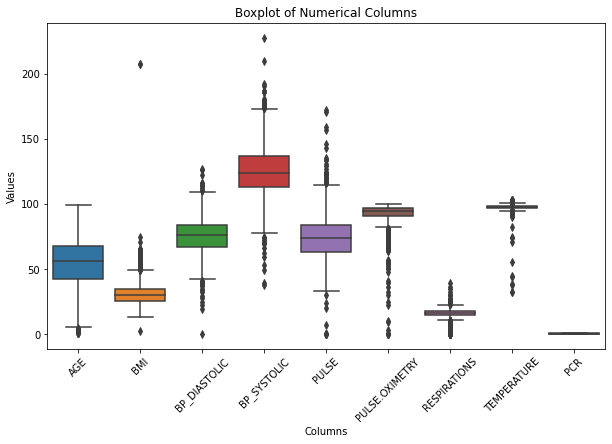

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

<Figure size 720x432 with 0 Axes>

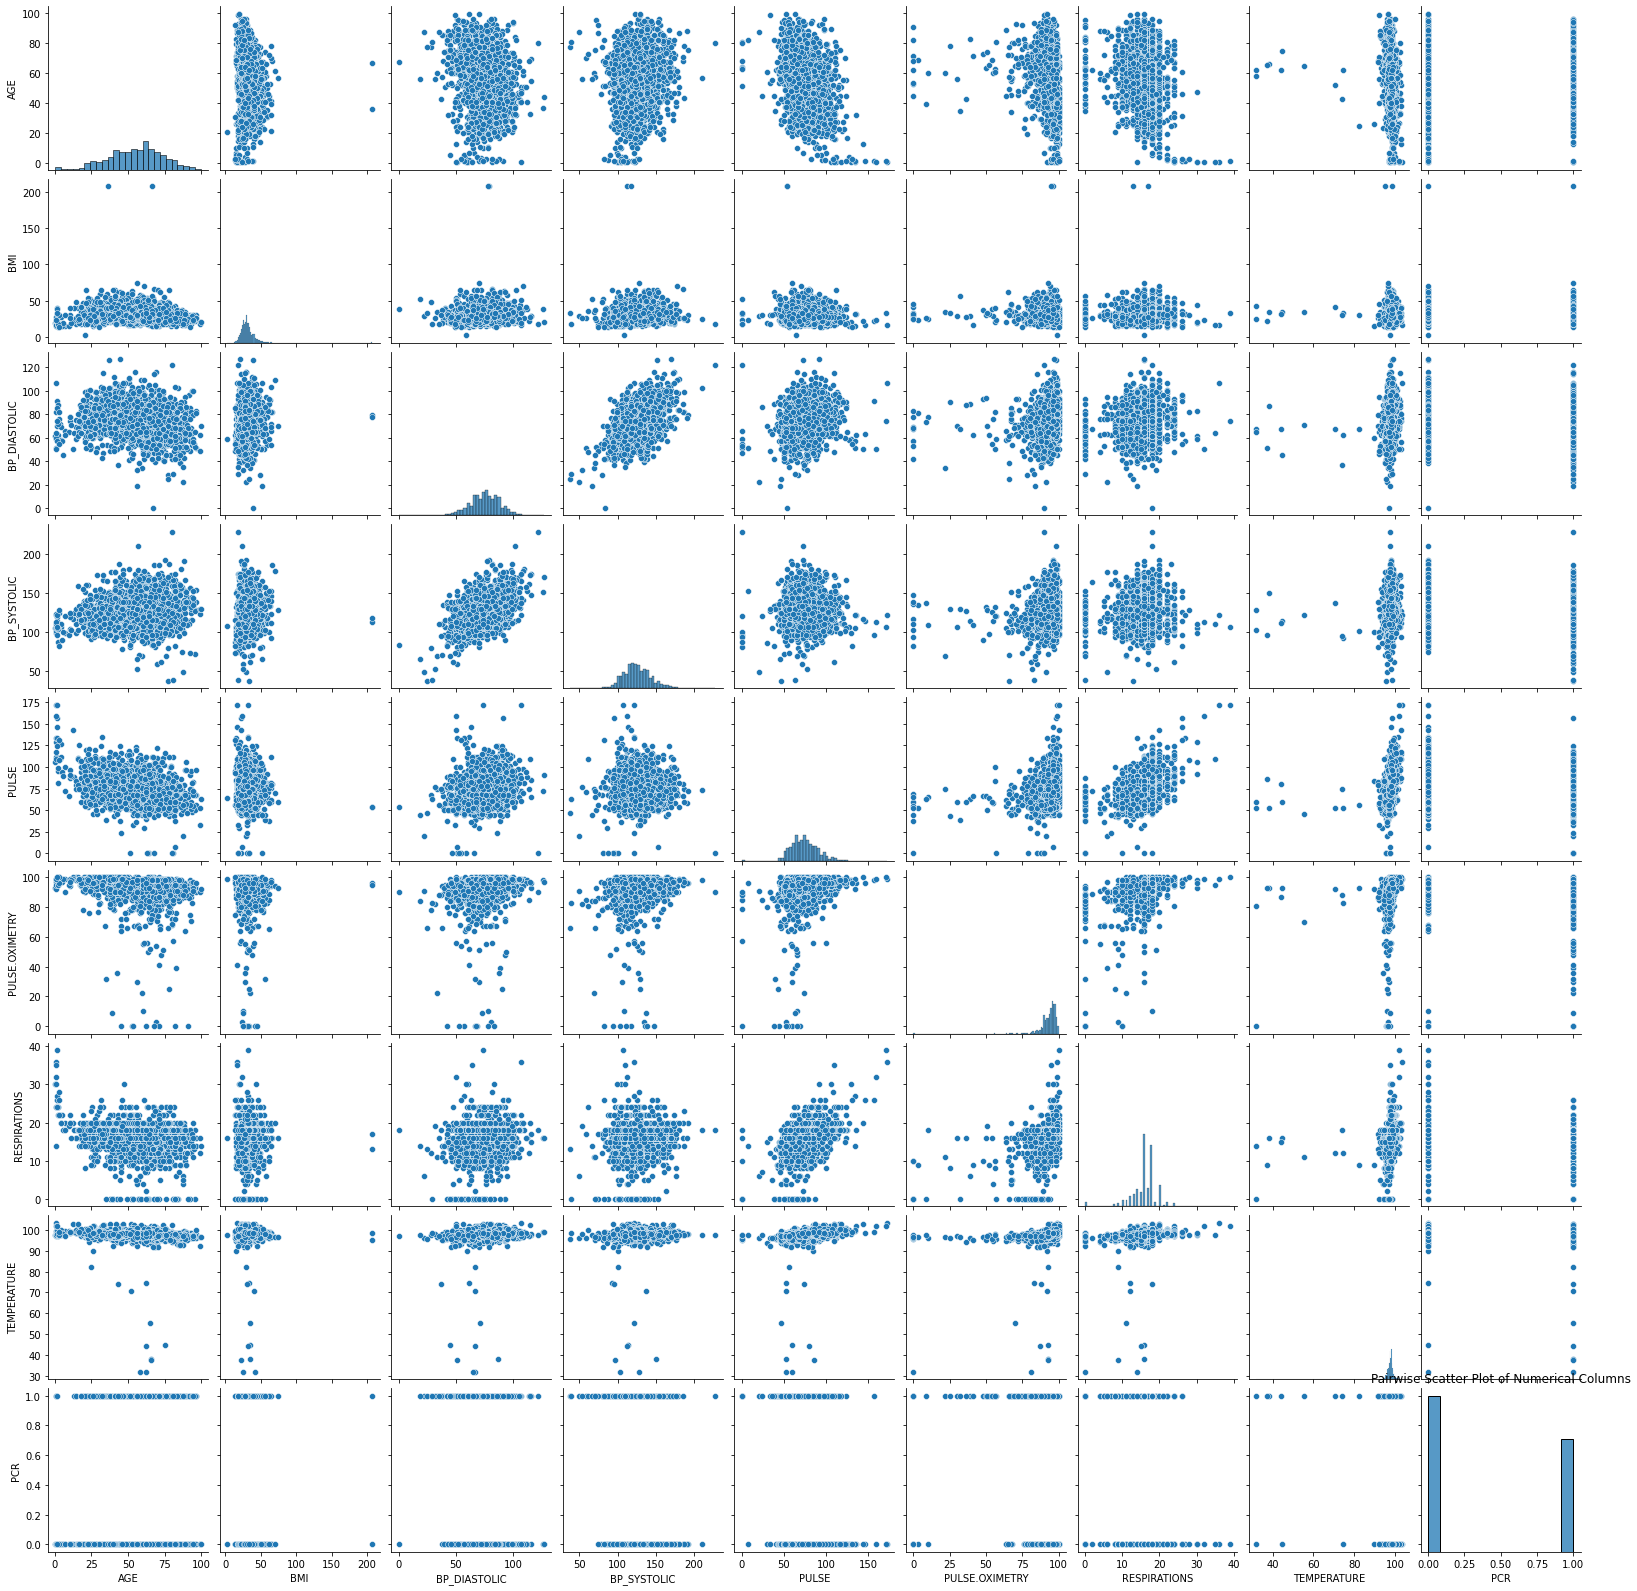

In [36]:
# Scatter plot (pairwise)
plt.figure(figsize=(10, 6))
sns.pairplot(df[numerical_cols])
plt.title('Pairwise Scatter Plot of Numerical Columns')
plt.show()

# Remove Outliers

In [37]:
# Calculate Interquartile Range (IQR)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outlier_indices_iqr = np.where((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound))


outlier_indices = [index for sublist in outlier_indices_iqr for index in sublist]

# Remove outliers
df_cleaned = df.drop(outlier_indices, axis=0)
df = df_cleaned

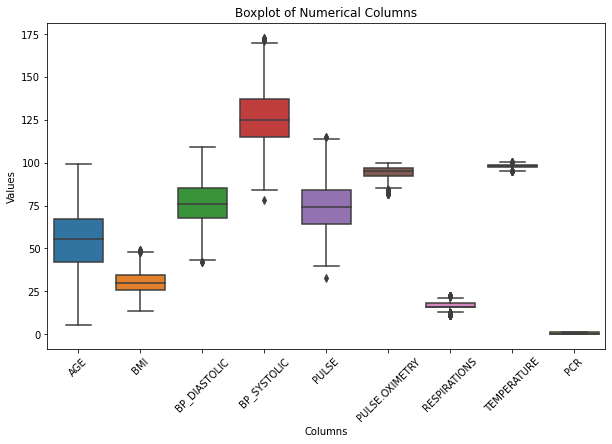

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

## Pro-process

In [39]:
X = df.drop(columns=['PCR', 'hashed_mrn'])
y = df['PCR']

X

,SEX,ETHNICITY,AGE,BMI,BP_DIASTOLIC,BP_SYSTOLIC,PULSE,PULSE.OXIMETRY,RESPIRATIONS,TEMPERATURE,...,B34.9,N17.9,J02.9,R19.7,R07.89,R53.1,R52,E11.9,I50.9,R06.02
8,FEMALE,HISPANIC OR LATINO,61.8,30.67,65,120,58,90,12,98.2,...,False,False,False,False,False,False,False,False,False,False
9,MALE,NOT HISPANIC OR LATINO,54.5,31.44,67,136,85,91,14,98.0,...,False,False,False,False,False,False,False,False,False,False
10,MALE,NOT HISPANIC OR LATINO,61.8,21.90,70,134,70,94,18,97.2,...,False,False,False,False,False,False,False,False,True,False
11,MALE,NOT HISPANIC OR LATINO,72.8,27.21,56,108,61,95,13,96.7,...,False,False,False,False,False,False,False,False,False,True
12,FEMALE,NOT HISPANIC OR LATINO,49.9,30.54,83,132,99,99,18,99.7,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,FEMALE,NOT HISPANIC OR LATINO,62.4,37.38,65,134,75,93,16,97.0,...,False,False,False,False,False,False,False,True,False,True
1982,MALE,NOT HISPANIC OR LATINO,64.2,27.83,83,121,92,93,17,99.1,...,False,False,False,False,False,False,False,False,False,False
1983,FEMALE,HISPANIC OR LATINO,56.4,30.23,72,129,78,98,22,98.3,...,False,False,True,False,False,False,False,False,False,True
1984,FEMALE,HISPANIC OR LATINO,62.3,33.09,84,133,71,96,18,98.5,...,False,False,True,False,False,False,False,False,False,True


In [40]:
# Categorical Encoding
X = pd.get_dummies(X)
X

,AGE,BMI,BP_DIASTOLIC,BP_SYSTOLIC,PULSE,PULSE.OXIMETRY,RESPIRATIONS,TEMPERATURE,Z20.828,R05,...,R07.89,R53.1,R52,E11.9,I50.9,R06.02,SEX_FEMALE,SEX_MALE,ETHNICITY_HISPANIC OR LATINO,ETHNICITY_NOT HISPANIC OR LATINO
8,61.8,30.67,65,120,58,90,12,98.2,False,False,...,False,False,False,False,False,False,1,0,1,0
9,54.5,31.44,67,136,85,91,14,98.0,False,False,...,False,False,False,False,False,False,0,1,0,1
10,61.8,21.90,70,134,70,94,18,97.2,True,False,...,False,False,False,False,True,False,0,1,0,1
11,72.8,27.21,56,108,61,95,13,96.7,False,False,...,False,False,False,False,False,True,0,1,0,1
12,49.9,30.54,83,132,99,99,18,99.7,True,True,...,False,False,False,False,False,True,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,62.4,37.38,65,134,75,93,16,97.0,False,True,...,False,False,False,True,False,True,1,0,0,1
1982,64.2,27.83,83,121,92,93,17,99.1,True,False,...,False,False,False,False,False,False,0,1,0,1
1983,56.4,30.23,72,129,78,98,22,98.3,True,True,...,False,False,False,False,False,True,1,0,1,0
1984,62.3,33.09,84,133,71,96,18,98.5,True,False,...,False,False,False,False,False,True,1,0,1,0


In [41]:
# Iterate over columns
for column in X.columns:
    if X[column].dtype == bool:
        X[column] = X[column].replace({False: 0, True: 1})
X

,AGE,BMI,BP_DIASTOLIC,BP_SYSTOLIC,PULSE,PULSE.OXIMETRY,RESPIRATIONS,TEMPERATURE,Z20.828,R05,...,R07.89,R53.1,R52,E11.9,I50.9,R06.02,SEX_FEMALE,SEX_MALE,ETHNICITY_HISPANIC OR LATINO,ETHNICITY_NOT HISPANIC OR LATINO
8,61.8,30.67,65,120,58,90,12,98.2,0,0,...,0,0,0,0,0,0,1,0,1,0
9,54.5,31.44,67,136,85,91,14,98.0,0,0,...,0,0,0,0,0,0,0,1,0,1
10,61.8,21.90,70,134,70,94,18,97.2,1,0,...,0,0,0,0,1,0,0,1,0,1
11,72.8,27.21,56,108,61,95,13,96.7,0,0,...,0,0,0,0,0,1,0,1,0,1
12,49.9,30.54,83,132,99,99,18,99.7,1,1,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,62.4,37.38,65,134,75,93,16,97.0,0,1,...,0,0,0,1,0,1,1,0,0,1
1982,64.2,27.83,83,121,92,93,17,99.1,1,0,...,0,0,0,0,0,0,0,1,0,1
1983,56.4,30.23,72,129,78,98,22,98.3,1,1,...,0,0,0,0,0,1,1,0,1,0
1984,62.3,33.09,84,133,71,96,18,98.5,1,0,...,0,0,0,0,0,1,1,0,1,0


In [42]:
y

8       1
9       1
10      0
11      0
12      0
       ..
1981    0
1982    0
1983    0
1984    0
1985    1
Name: PCR, Length: 1559, dtype: int64

## Balance the data

In [43]:
x_train_randOverSample = X.copy()
y_train_randOverSample = y.copy()

print("Before OverSampling- counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling- counts of label '0': {} \n".format(sum(y==0)))
print("*******************************************************************")

randOverSample = RandomOverSampler(random_state=100,)
x_train_randOverSample, y_train_randOverSample = randOverSample.fit_resample(x_train_randOverSample, y_train_randOverSample.ravel())

print('After OverSampling with RandomOverSampler- x_train: {}'.format(x_train_randOverSample.shape))
print('After OverSampling with RandomOverSampler- y_train: {} \n'.format(y_train_randOverSample.shape))

print("After OverSampling with RandomOverSampler- counts of label '1': {}".format(sum(y_train_randOverSample==1)))
print("After OverSampling with RandomOverSampler- counts of label '0': {}".format(sum(y_train_randOverSample==0)))

X = x_train_randOverSample
y = y_train_randOverSample

Before OverSampling- counts of label '1': 629
Before OverSampling- counts of label '0': 930 

*******************************************************************
After OverSampling with RandomOverSampler- x_train: (1860, 32)
After OverSampling with RandomOverSampler- y_train: (1860,) 

After OverSampling with RandomOverSampler- counts of label '1': 930
After OverSampling with RandomOverSampler- counts of label '0': 930


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train_scaled

array([[ 0.98638647,  0.75637553,  0.0975593 , ..., -1.0151688 ,
        -0.65633012,  0.65633012],
       [ 1.20035325, -1.30592618, -0.40126255, ..., -1.0151688 ,
        -0.65633012,  0.65633012],
       [-0.7253478 ,  0.46695626,  0.84579209, ..., -1.0151688 ,
        -0.65633012,  0.65633012],
       ...,
       [ 0.85688025,  1.21399134,  0.92892906, ..., -1.0151688 ,
        -0.65633012,  0.65633012],
       [ 0.56971431,  1.31096952, -0.40126255, ...,  0.98505786,
        -0.65633012,  0.65633012],
       [-1.53616929,  0.51241478,  1.01206604, ..., -1.0151688 ,
        -0.65633012,  0.65633012]])

## Models

In [47]:
##########   Logistic Regression 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


lr_model = LogisticRegression(random_state=42)


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 2, 3, 5, 10],  
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
}


grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_


y_pred_lr_best = best_lr_model.predict(X_test_scaled)


print("Best Logistic Regression Parameters:", best_params)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_best))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr_best))


Best Logistic Regression Parameters: {'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.7010752688172043
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.71       229
           1       0.72      0.67      0.70       236

    accuracy                           0.70       465
   macro avg       0.70      0.70      0.70       465
weighted avg       0.70      0.70      0.70       465



In [48]:
##########   SVM

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# parameter grid

params_grid = {
    'C': [1, 2, 4, 5, 6],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}



svm_model = SVC(random_state=42)


grid_search = GridSearchCV(estimator=svm_model, param_grid=params_grid, cv=5)


grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred_svm = best_estimator.predict(X_test_scaled)

# Evaluate the model
print("Best Parameters:", best_params)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

Best Parameters: {'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy: 0.7225806451612903
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72       229
           1       0.72      0.74      0.73       236

    accuracy                           0.72       465
   macro avg       0.72      0.72      0.72       465
weighted avg       0.72      0.72      0.72       465



In [49]:
##########  Random Forest (RF)


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [10, 50,  100, 200, 300],  
    'max_depth': [ 2, 4, 6, 10],      
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred_rf_best = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
print("Best Random Forest Parameters:", best_params)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_best))


Best Random Forest Parameters: {'max_depth': 10, 'n_estimators': 300}
Random Forest Accuracy: 0.7634408602150538
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       229
           1       0.76      0.79      0.77       236

    accuracy                           0.76       465
   macro avg       0.76      0.76      0.76       465
weighted avg       0.76      0.76      0.76       465



# Voting Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


#Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42) 
lr_model = LogisticRegression(C=1.0, solver='saga', random_state=42) 
svc_model = SVC(kernel='rbf', C=9.0, gamma= 'scale', probability=True, random_state=42)  
knn_model = KNeighborsClassifier(n_neighbors=5)  

estimators = [('random_forest', rf_model),
              #('logistic_regression', lr_model),
              ('support_vector_classifier', svc_model)
]


voting_clf = VotingClassifier(estimators=estimators, voting='hard')


voting_clf.fit(X_train_scaled, y_train)


y_pred_voting = voting_clf.predict(X_test_scaled)

# Evaluate the model
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Voting Classification Report:\n", classification_report(y_test, y_pred_voting))


Voting Classifier Accuracy: 0.7978494623655914
Voting Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       229
           1       0.84      0.74      0.79       236

    accuracy                           0.80       465
   macro avg       0.80      0.80      0.80       465
weighted avg       0.80      0.80      0.80       465



# ROC Curve (Hard Voting)

AUC Score: 0.83672563096736


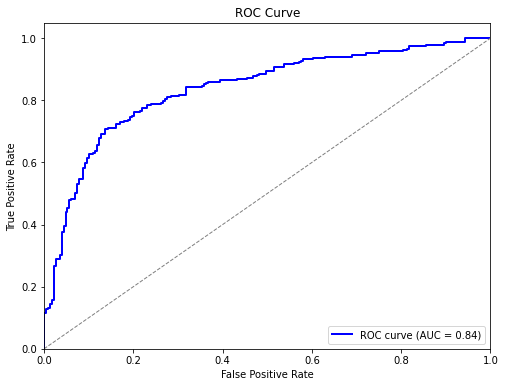

In [80]:
import numpy as np


clf_name = voting_clf
#clf_name = best_rf_model


# Predict probabilities for each model
probs = np.array([clf.predict_proba(X_test_scaled) for clf in clf_name.estimators_])

# Combine probabilities (e.g., by taking the mean)
combined_probs = np.mean(probs, axis=0)

# Make a hard decision based on combined probabilities
combined_preds = np.argmax(combined_probs, axis=1)

# Calculate the AUC score
auc = roc_auc_score(y_test, combined_probs[:, 1])  
print("AUC Score:", auc)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, combined_probs[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Plot random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# ROC Curve (Soft Voting)

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

decision_scores = voting_clf.predict_proba(X_test_scaled)[:, 1]
    
auc = roc_auc_score(y_test, decision_scores)
print("AUC Score:", auc)

fpr, tpr, thresholds = roc_curve(y_test, decision_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Plot random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



AttributeError: This 'VotingClassifier' has no attribute 'predict_proba'